/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_49738/1730410220.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("Simulation_6-9_14-6-4.csv", index_col=False)


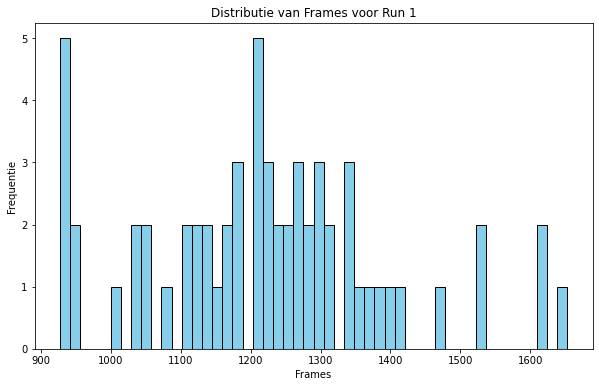

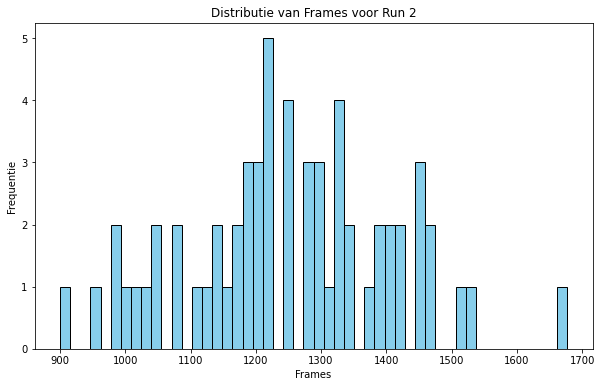

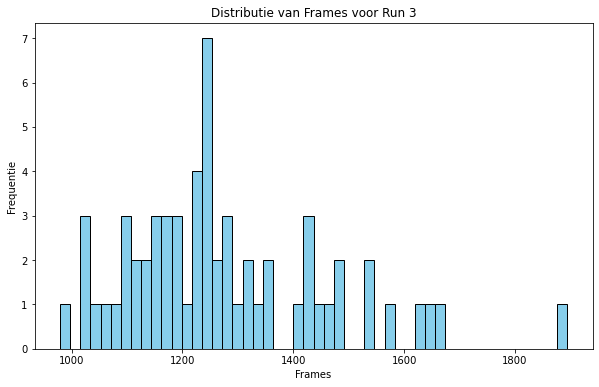

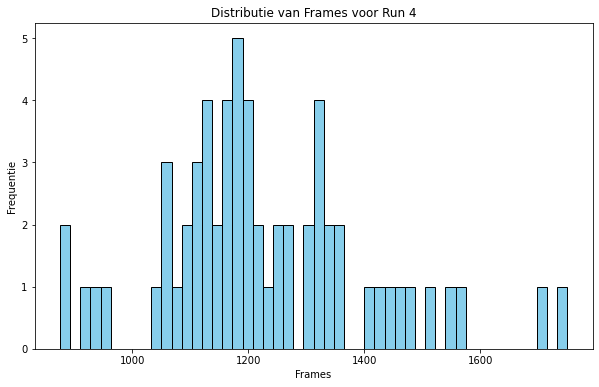

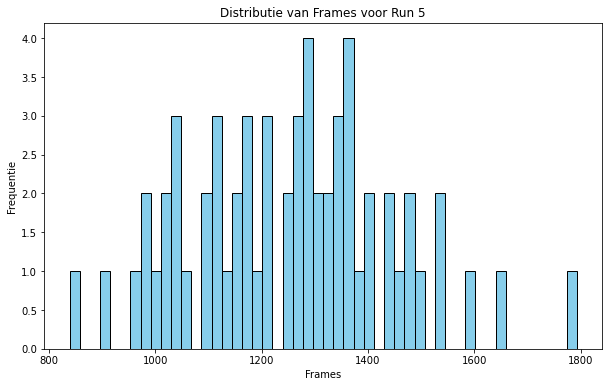

/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_49738/1730410220.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_49738/1730410220.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_49738/1730410220.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summar

/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_49738/1730410220.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_49738/1730410220.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_49738/1730410220.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summar

/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_49738/1730410220.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_49738/1730410220.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_49738/1730410220.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summar

         Run  Mean Frames  Std Frames Min Frames Max Frames
0        1.0  1221.704918  173.022093      927.0     1653.0
1        2.0  1249.606557  158.981894      900.0     1677.0
2        3.0  1275.836066  182.976882      979.0     1894.0
3        4.0  1227.508197  179.662241      875.0     1750.0
4        5.0  1253.934426  191.864611      839.0     1793.0
..       ...          ...         ...        ...        ...
96      97.0  1224.983607  170.293716      869.0     1761.0
97      98.0  1255.163934  173.841132      926.0     1655.0
98      99.0  1225.311475  147.197661      953.0     1610.0
99     100.0  1217.098361  185.607624      843.0     1622.0
100  Average  1239.596557  170.128573     903.08    1710.95

[101 rows x 5 columns]


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lees het CSV-bestand in
df = pd.read_csv("Simulation_6-9_14-6-4.csv", index_col=False)

# Verwijder de genoemde kolommen
df = df.drop(['Cell kind', 'Coordinates'], axis=1)

# Maak nieuwe kolommen op basis van de 'Event' kolom
df['exit'] = df.loc[df['Event'] == 'exit', 'Frame'].astype(float)
df['entry'] = df.loc[df['Event'] == 'entry', 'Frame'].astype(float)

# Verwijder de 'Event' en 'Frame' kolommen
df = df.drop(['Event', 'Frame'], axis=1)

# Voeg een 'Run' kolom toe
df['Run'] = np.nan

# Ga door de rijen en verhoog het runnummer elke keer als je de kolomnamen tegenkomt
run = 1
for i, row in df.iterrows():
    if row[0] == 'ID':  # als de eerste waarde van de rij 'ID' is, dan is dit de start van een nieuwe run
        run += 1
    else:
        df.at[i, 'Run'] = run

# Verwijder de rijen met de kolomnamen
df = df[df['ID'] != 'ID']

# Splits het DataFrame in afzonderlijke DataFrames per unieke Run
dfs = [x for _, x in df.groupby('Run')]

# Voor elke DataFrame, groepeer de rijen op basis van de ID en combineer de waarden van 'exit' en 'entry'
for i in range(len(dfs)):
    dfs[i] = dfs[i].groupby(['ID'], as_index=False).first()

# Combineer de DataFrames weer
df = pd.concat(dfs)

# Verwijder de rijen die geen 'exit' waarde hebben
df = df.dropna(subset=['exit'])

# Voor elke unieke Run, verwijder de rijen met de eerste 20 unieke ID's
for run in df['Run'].unique():
    ids_to_remove = df[df['Run'] == run]['ID'].unique()[:20]
    df = df[~((df['Run'] == run) & (df['ID'].isin(ids_to_remove)))]

# Berekent het verschil tussen 'exit' en 'entry' kolommen
df['Frames'] = df['exit'].astype(float) - df['entry'].astype(float)

# Datatype van 'Run' kolom naar integer veranderen
df['Run'] = df['Run'].astype(int)

# Unieke runs identificeren
runs = df['Run'].unique()

# Plot maken voor elke unieke run
for run in runs[:5]:  # Wijzigen om meer of minder runs te visualiseren
    df_run = df[df['Run'] == run]
    plt.figure(figsize=(10,6))
    plt.hist(df_run['Frames'], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distributie van Frames voor Run {run}')
    plt.xlabel('Frames')
    plt.ylabel('Frequentie')
    plt.show()

summary_df = pd.DataFrame(columns=['Run', 'Mean Frames', 'Std Frames', 'Min Frames', 'Max Frames'])

# Voor elke unieke run, bereken en sla de gemiddelde, standaarddeviatie, minimum en maximum van de 'Frames' op
for run in df['Run'].unique():
    df_run = df[df['Run'] == run]
    mean_frames = df_run['Frames'].mean()
    std_frames = df_run['Frames'].std()
    min_frames = df_run['Frames'].min()
    max_frames = df_run['Frames'].max()
    summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)

# Bereken het gemiddelde van de kolommen over alle runs
average_all_runs = summary_df.mean()
average_all_runs['Run'] = 'Average'

# Voeg de gemiddelde waarden toe aan het einde van de DataFrame
summary_df = summary_df.append(average_all_runs, ignore_index=True)

# Afdrukken van het overzicht
print(summary_df)

# Opslaan van het df DataFrame als een CSV-bestand
df.to_csv('verwerkte_data.csv', index=False)

# Opslaan van het summary_df DataFrame als een CSV-bestand
summary_df.to_csv('samenvatting_data.csv', index=False)